
# 1.-Datos Malaria

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [5]:
Categories=['Uninfected','Parasitized']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");


Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball


Cargamos los datos

In [6]:
import random

# Establecer la semilla
random.seed(42)

In [7]:
flat_data_arr = []
target_arr = []
# Por favor, utiliza datadir='/content' si los archivos se cargan en Google Colab
# De lo contrario, monta la unidad y proporciona la ruta del directorio principal que contiene todas las carpetas de imágenes de categoría.
datadir = r'C:\Users\andre\Desktop\2º Cuatri\TFG\codigo\cell_images'

# Iterar sobre las categorías
for i in Categories:
    print(f'Cargando... categoría: {i}')
    path = os.path.join(datadir, i)
    images_in_category = os.listdir(path)
    # Seleccionar solo el 10% de las imágenes en la categoría actual
    num_images_to_select = int(0.1 * len(images_in_category))
    selected_images = np.random.choice(images_in_category, num_images_to_select, replace=False)
    
    for img in selected_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (60, 60, 3))
        flat_data_arr.append(img_resized)
        target_arr.append(Categories.index(i))
    print(f'Categoría cargada correctamente: {i}')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

Cargando... categoría: Uninfected
Categoría cargada correctamente: Uninfected
Cargando... categoría: Parasitized
Categoría cargada correctamente: Parasitized


In [8]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
import numpy as np

# Calcula la media y la desviación estándar de flat_data
mean_value = np.mean(flat_data)
std_value = np.std(flat_data)

print("Media de los datos:", mean_value)
print("Desviación estándar de los datos:", std_value)


Media de los datos: 0.46999324108003204
Desviación estándar de los datos: 0.2993016801740591


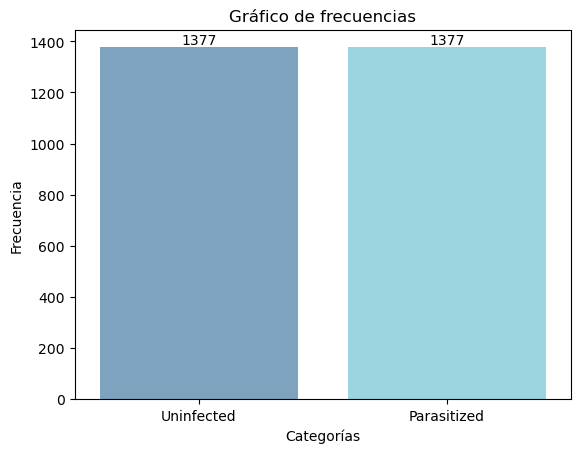

In [10]:
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Supongamos que 'target' es tu variable de destino
colores = ['#73A4CA', '#91DCEA', '#64CDCC', '#5FBB68', '#F9D23C', '#F9A729', '#FD6F30']

# Convert hexadecimal colors to RGBA
colores_rgba = [mcolors.to_rgba(color) if len(color) == 7 else mcolors.to_rgba(color + 'FF') for color in colores]

# Crear un DataFrame con los datos
df = pd.DataFrame(target, columns=['Labels'])

# Convertir 0 y 1 de 'target' a 'Parasitized' y 'Uninfected'
df['Labels'] = df['Labels'].replace({0: 'Uninfected', 1: 'Parasitized'})

# Gráfico de conteo con las categorías 'Parasitized' y 'Uninfected'
sx = sns.countplot(x='Labels', data=df, palette=colores_rgba)

# Añadir etiquetas a los ejes x e y
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Añadir título al gráfico
plt.title('Gráfico de frecuencias')

# Añadir el número de conteo encima de cada barra
for p in sx.patches:
    sx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Guardar el gráfico como imagen
plt.savefig('frecuencias.png')

# Mostrar el gráfico
plt.show()


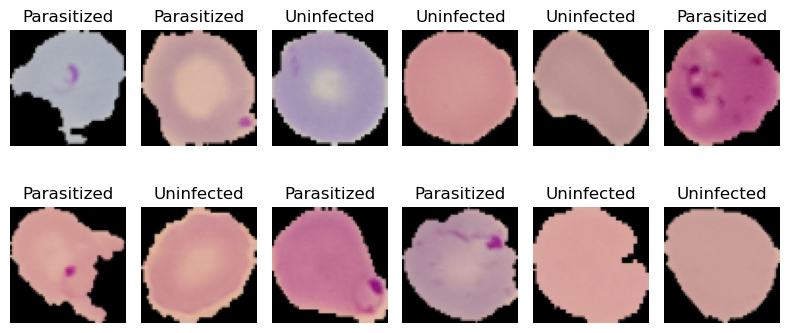

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

rows = 2
cols = 6

for n, i in enumerate(list(np.random.randint(0, len(flat_data), rows * cols))):
    plt.subplot(rows, cols, n+1)
    plt.imshow(flat_data[i])
    plt.title(Categories[target[i]])
    plt.axis('off')

plt.tight_layout()
plt.savefig('malaria.png')
plt.show()



## 1.2.-Divido

In [12]:
import random

# Establecer la semilla
random.seed(42)

In [13]:
# División en datos de entrenamiento (70%) y datos restantes (30%)
x_train_rest, x_test, y_train_rest, y_test = train_test_split(flat_data, target, test_size=0.20, random_state=77, stratify=target)

# División de los datos restantes en datos de validación (20%) y datos de testeo (10%)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_rest, y_train_rest, test_size=0.25, random_state=42, stratify=y_train_rest)

print('Datos divididos con éxito.')

Datos divididos con éxito.


In [14]:
print(len(y_test))
print(len(y_train))
print(len(y_valid))

551
1652
551


In [15]:
s = 60
trainX = np.array(x_train)
testX = np.array(x_test)
validX = np.array(x_valid)
validY = np.array(y_valid)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(validX.shape)
print(validY.shape)
print(trainY.shape)
print(testY.shape)

(1652, 60, 60, 3)
(551, 60, 60, 3)
(551, 60, 60, 3)
(551,)
(1652,)
(551,)


# 2.- Redes neuronales

In [14]:
import matplotlib.image as mpimg
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [15]:
s = 60
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.add(layers.Flatten()) #Aquí aplana la imagen
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 554,642 (2.12 MB)

 Trainable params: 554,642 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

## 2.1.- Entreno el modelo

In [19]:
import random

# Establecer la semilla
random.seed(42)

In [20]:
# with tf.device('/cpu:0'):
#   model.compile(optimizer='adam',
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy'])

#   history = model.fit(train_images, train_labels, epochs=10,
#                       validation_data=(test_images, test_labels))

with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(trainX, trainY, epochs=20,validation_data=(validX, validY))

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.5173 - loss: 0.6939 - val_accuracy: 0.4991 - val_loss: 0.6914
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5162 - loss: 0.6875 - val_accuracy: 0.7024 - val_loss: 0.5946
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6776 - loss: 0.5911 - val_accuracy: 0.7278 - val_loss: 0.6374
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7669 - loss: 0.5433 - val_accuracy: 0.8566 - val_loss: 0.3665
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8533 - loss: 0.3441 - val_accuracy: 0.9002 - val_loss: 0.2150
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9290 - loss: 0.1730 - val_accuracy: 0.9038 - val_loss: 0.2023
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9116 - loss: 0.2115 - val_accuracy: 0.9238 - val_loss: 0.2336
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9390 - loss: 0.1765 - val_accuracy: 0.9238 - v

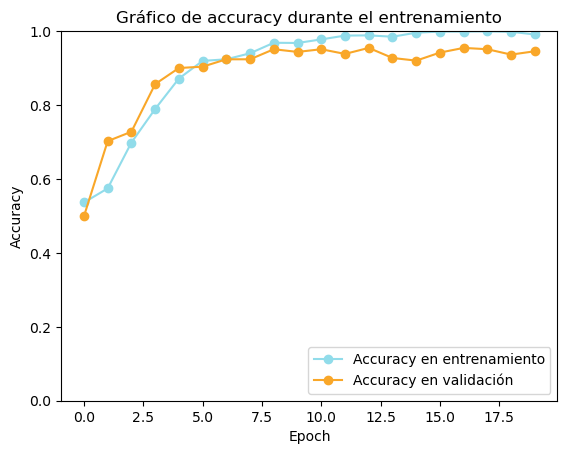

In [21]:
plt.plot(history.history['accuracy'], label='Accuracy en entrenamiento', marker="o", color=colores[1])
plt.plot(history.history['val_accuracy'], label='Accuracy en validación', marker="o", color=colores[5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Gráfico de accuracy durante el entrenamiento')
plt.savefig('precision.png')
plt.show()

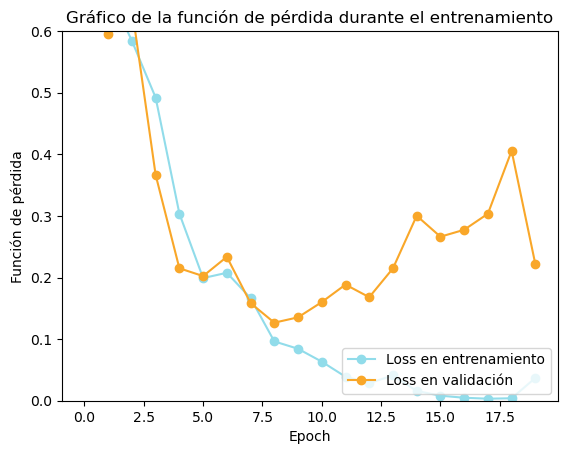

In [22]:
plt.plot(history.history['loss'], label='Loss en entrenamiento', marker="o", color=colores[1])
plt.plot(history.history['val_loss'], label='Loss en validación', marker="o", color=colores[5])
plt.xlabel('Epoch')
plt.ylabel('Función de pérdida')
plt.ylim([0, 0.6])
plt.legend(loc='lower right')
plt.title('Gráfico de la función de pérdida durante el entrenamiento')
plt.savefig('loss.png')
plt.show()

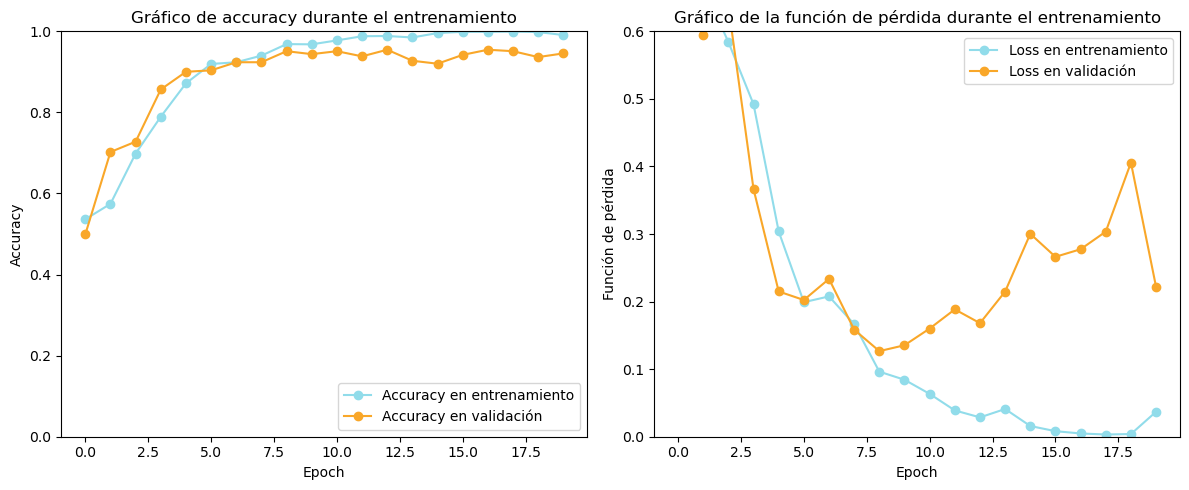

In [23]:
import matplotlib.pyplot as plt

# Gráfico de accuracy y loss en entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy en entrenamiento', marker="o", color=colores[1])
plt.plot(history.history['val_accuracy'], label='Accuracy en validación', marker="o", color=colores[5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Gráfico de accuracy durante el entrenamiento')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss en entrenamiento', marker="o", color=colores[1])
plt.plot(history.history['val_loss'], label='Loss en validación', marker="o", color=colores[5])
plt.xlabel('Epoch')
plt.ylabel('Función de pérdida')
plt.ylim([0, 0.6])
plt.legend(loc='upper right')
plt.title('Gráfico de la función de pérdida durante el entrenamiento')

plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos para que no se superpongan
plt.savefig('accuracy_loss.png')
plt.show()


## 2.2.- Evaluo el modelo

In [24]:
predict_x=model.predict(testX)
Y_test_pred=np.argmax(predict_x,axis=1)

Y_test = testY.flatten()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [25]:
import sklearn.metrics as metrics

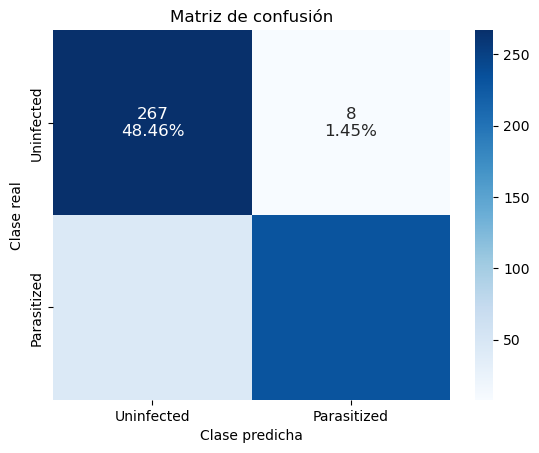

In [26]:
# Crear el DataFrame de la matriz de confusión
cf_matrix = confusion_matrix(Y_test, Y_test_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión')
plt.savefig('confusion_matrix.png')
plt.show()

In [27]:
cf_matrix

array([[267,   8],
       [ 45, 231]], dtype=int64)

## 2.3.- Métricas 

In [28]:
from sklearn import metrics

# Supongamos que ya tenemos la matriz de confusión (cf_matrix), Y_test y Y_test_pred definidas previamente

# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_test_pred)
roc_auc = metrics.auc(fpr, tpr)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
print("ROC AUC:\t{:.2f}".format(roc_auc))

Especificidad:	0.97
ROC AUC:	0.90


In [29]:
report = classification_report(Y_test, Y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       275
           1       0.97      0.84      0.90       276

    accuracy                           0.90       551
   macro avg       0.91      0.90      0.90       551
weighted avg       0.91      0.90      0.90       551



In [30]:
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, Y_test_pred),2)))


Accuracy	0.9


In [31]:
# Guardar el gráfico como una imagen
#plt.savefig('mi_grafico.png')

## 2.4.- Curva ROC

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
Y_test_pred_logits =predict_x
y_scores = np.exp(Y_test_pred_logits) / np.sum(np.exp(Y_test_pred_logits), axis=1, keepdims=True)
n_classes=2

# Extraer las puntuaciones de confianza para la clase positiva (clase 1)
y_scores_pos = y_scores[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores_pos)
roc_auc = auc(fpr, tpr)


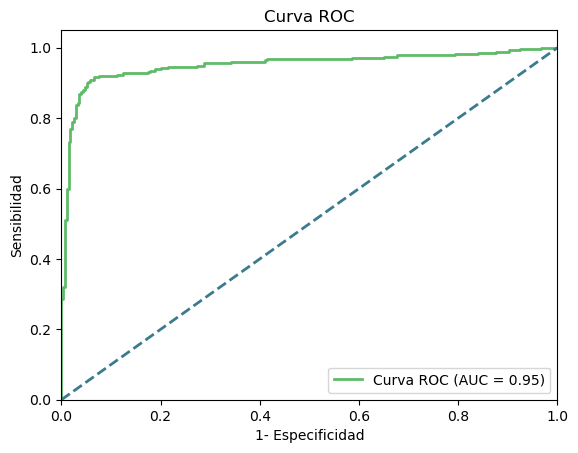

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores_pos)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_roc.png')
plt.show()

# Guardar la figura como un archivo de imagen



Si average es micro, se calcula el puntaje F1 agregando las contribuciones de todas las clases y luego calculando el promedio.
Si average es macro, se calcula el puntaje F1 por clase y luego se promedia sin considerar el desequilibrio de clase.
Si average es weighted, se calcula el puntaje F1 por clase y se promedia, pero cada puntaje se pondera por el soporte de la clase (es decir, el número de instancias verdaderas de esa clase en el conjunto de datos).

# 3.- Aplanar datos

In [16]:
trainX2 = []  # Asegúrate de que esta lista está creada antes de usarla

# Para trainX
for img in trainX:
    # Aplana la imagen y agrega la fila a la lista
    trainX2.append(img.flatten())

# Para validX
for img in validX:
    # Aplana la imagen y agrega la fila a la lista
    trainX2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un DataFrame de Pandas
trainX2 = pd.DataFrame(trainX2)


In [17]:
len(trainX2)

2203

In [18]:
y_train = np.concatenate((y_train, y_valid), axis=0)

In [19]:
testX2 = []  # Asegúrate de que esta lista está creada antes de usarla

for img in testX:
    # Aplana la imagen y agrega la fila a la lista
    testX2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un array NumPy
testX2 = np.array(testX2)

In [20]:
Data2 = []  # Asegúrate de que esta lista está creada antes de usarla

for img in flat_data:
    # Aplana la imagen y agrega la fila a la lista
    Data2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un array NumPy
Data2 =  pd.DataFrame(Data2)

# 4.- SVM lineal

In [25]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#[0.0001,0.001,0.01, 0.1, 1]
# Supongamos que x1_train, y1_train son tus datos de entrenamiento

# Definir el espacio de búsqueda para los hiperparámetros del clasificador
param_grid = {
    'C': [0.0001,0.001,0.01, 0.1, 1]
}

# Definir el clasificador (SVC) directamente sin pipeline
classifier = LinearSVC()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "f1"
# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros
grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring, n_jobs=-1)


In [26]:
grid_search.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]}, scoring='f1')

In [27]:
# Imprimir los mejores parámetros encontrados y el mejor score
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", round(grid_search.best_score_,3))

Mejores Parámetros: {'C': 0.001}
Mejor Score F1: 0.623


In [28]:
# Imprimir los mejores parámetros encontrados y el mejor score
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", grid_search.best_score_)
print("Los mejores hiperparámetros son:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("La puntuación de la validación cruzada es:",round(grid_search.best_score_,2))

Mejores Parámetros: {'C': 0.001}
Mejor Score F1: 0.6225488055437329
Los mejores hiperparámetros son: {'C': 0.001}
La puntuación de la validación cruzada es: 0.62


Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.618

## 4.1.- Evaluo el modelo

In [47]:
from sklearn.metrics import f1_score

In [48]:
y_pred = best_model.predict(testX2)
# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred))
print(f"El modelo entrenado con todos los datos fue: {best_model}")

Precisión en el conjunto de prueba: 0.6347992351816444
El modelo entrenado con todos los datos fue: LinearSVC(C=0.001)


## 4.2.- Matriz de confusión

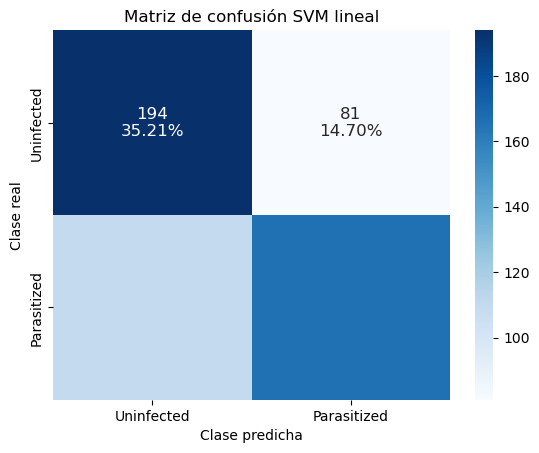

In [49]:
# Crear el DataFrame de la matriz de confusión
cf_matrix = confusion_matrix(y_test,y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM lineal')
plt.show()


In [50]:
cf_matrix

array([[194,  81],
       [110, 166]], dtype=int64)

## 4.3.- Métricas

In [51]:
from sklearn import metrics

num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.71


In [52]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.64      0.71      0.67       275
           1       0.67      0.60      0.63       276

    accuracy                           0.65       551
   macro avg       0.66      0.65      0.65       551
weighted avg       0.66      0.65      0.65       551



## 4.4.- Curva ROC

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)


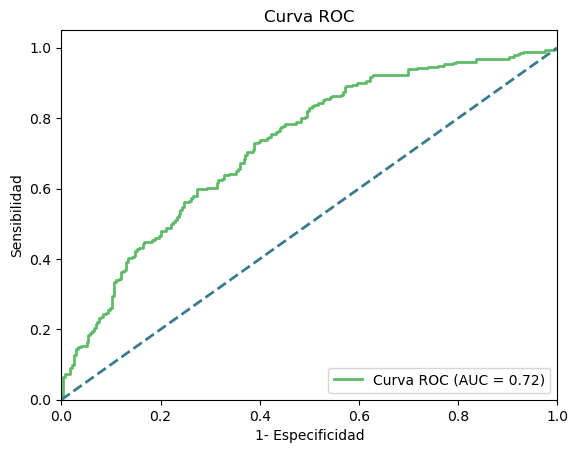

In [54]:
# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_roc2.png')
plt.show()


# 5.- SVM NO LINEAL: Kernel lineal, cuadrático y gausiano

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 5.1.- SVM Kernel lineal

In [61]:
param_grid_linear = [
    {
        "C":  [0.0001,0.001,0.01, 0.1, 1],
        "kernel": ["linear"]
   }
]
#0.01, 0.1, 1, 10, 100

In [62]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

# Definir métrica y mecanismos de evaluación interno
cv = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "f1"

# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros para cada modelo

# Modelo con kernel lineal
pipeline_linear = SVC()
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=cv, scoring=scoring, n_jobs=-1)


In [63]:
grid_search_linear.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['linear']}],
             scoring='f1')

In [64]:
best_score_linear = grid_search_linear.best_score_
best_params_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_

In [65]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_linear:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_linear}")
print(f"El mejor modelo fue: {best_model_linear}")

El mejor F1-score obtenido en la validación interna fue: 0.639
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.01, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=0.01, kernel='linear')


El mejor F1-score obtenido en la validación interna fue: 0.639
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.01, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=0.01, kernel='linear')

## 5.3.- Evaluación SVM lineal

In [66]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_linear = best_model_linear.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_linear))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_linear)

Precisión en el conjunto de prueba: 0.6315789473684211
El mejor modelo encontrado fue: SVC(C=0.01, kernel='linear')


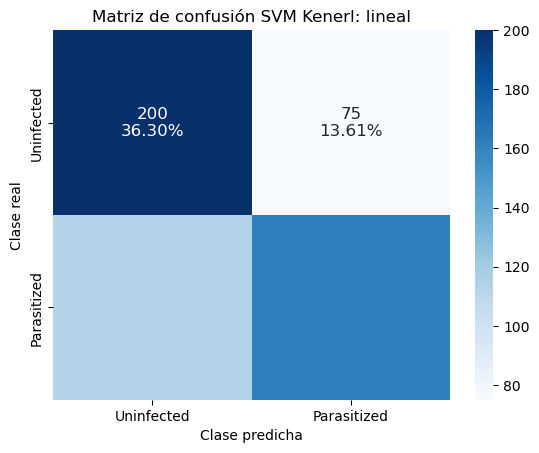

In [67]:
# Crear el DataFrame de la matriz de confusión
cf_matrix_linear = confusion_matrix(y_test,y_pred_linear)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_linear.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_linear.flatten()/np.sum(cf_matrix_linear)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix_linear.shape[0], cf_matrix_linear.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix_linear = pd.DataFrame(cf_matrix_linear, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix_linear, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: lineal')
plt.show()


In [68]:
cf_matrix_linear

array([[200,  75],
       [114, 162]], dtype=int64)

In [69]:

# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
  


Especificidad:	0.71


In [70]:
report = classification_report(y_test, y_pred_linear,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       275
           1       0.68      0.59      0.63       276

    accuracy                           0.66       551
   macro avg       0.66      0.66      0.66       551
weighted avg       0.66      0.66      0.66       551



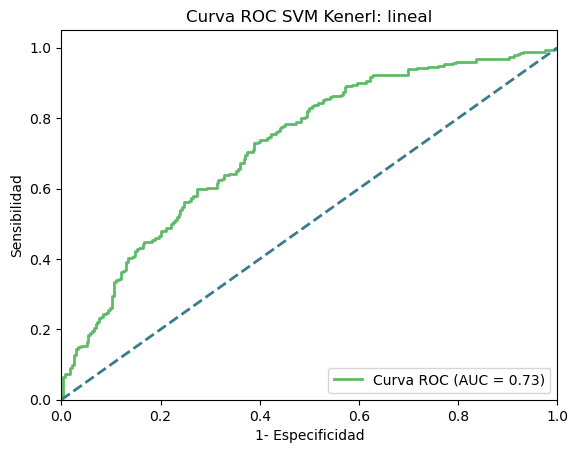

In [71]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores1 = best_model_linear.decision_function(testX2)
n_classes=2

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr1, tpr1, _ = roc_curve(y_test_bin, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SVM Kenerl: lineal')
plt.legend(loc="lower right")
plt.savefig('curva_roc3.png')
plt.show()

## 5.2.- SVM poly

In [72]:
param_grid_poly = [
    {
        "C":  [0.01, 0.1, 1, 10, 100],
        "kernel": ["poly"],
        "degree": [2],
        "coef0": np.linspace(0, 1, 10)
    }
]


In [73]:
pipeline_poly = SVC()
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=cv, scoring=scoring, n_jobs=-1)

In [74]:
grid_search_poly.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'coef0': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'degree': [2], 'kernel': ['poly']}],
             scoring='f1')

In [75]:
best_score_poly = grid_search_poly.best_score_
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_

In [76]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_poly:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_poly}")
print(f"El mejor modelo fue: {best_model_poly}")

El mejor F1-score obtenido en la validación interna fue: 0.659
Los mejores valores de los otros hiperparámetros fueron: {'C': 1, 'coef0': 0.8888888888888888, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=1, coef0=0.8888888888888888, degree=2, kernel='poly')


### 5.2.1.- Evaluación SVM POLY

In [77]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_poly = best_model_poly.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_poly))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_poly)

Precisión en el conjunto de prueba: 0.6905660377358489
El mejor modelo encontrado fue: SVC(C=1, coef0=0.8888888888888888, degree=2, kernel='poly')


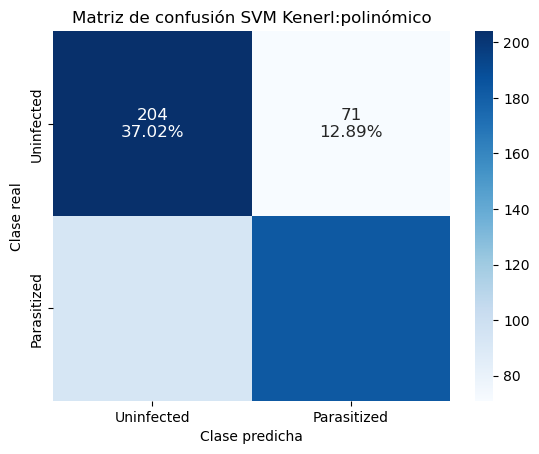

In [78]:
# Crear el DataFrame de la matriz de confusión
cf_matrix2 = confusion_matrix(y_test,y_pred_poly)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix2.shape[0], cf_matrix2.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix2, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl:polinómico')
plt.show()


In [79]:
cf_matrix2

array([[204,  71],
       [ 93, 183]], dtype=int64)

In [80]:
from sklearn import metrics

# Supongamos que ya tenemos la matriz de confusión (cf_matrix), Y_test y Y_test_pred definidas previamente

# Definir el número de clases
num_classes = 2
# Calcular la especificidad para cada clase
tn2 = cf_matrix2[0, 0]
fp2 = cf_matrix2[0, 1]  # Falsos positivos en la clase 0
specificity = tn2 / (tn2 + fp2)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.74


In [81]:
report = classification_report(y_test, y_pred_poly,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       275
           1       0.72      0.66      0.69       276

    accuracy                           0.70       551
   macro avg       0.70      0.70      0.70       551
weighted avg       0.70      0.70      0.70       551



### 5.2.2.-Curva ROC POLY

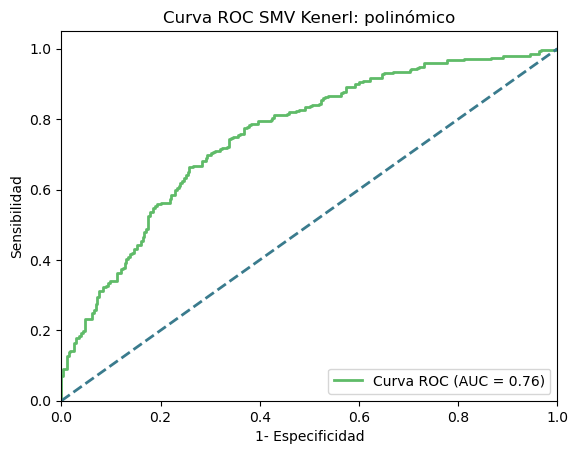

In [82]:

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores2 = best_model_poly.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr2, tpr2, _ = roc_curve(y_test_bin, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SMV Kenerl: polinómico')
plt.legend(loc="lower right")
plt.savefig('curva_roc4.png')
plt.show()

## 5.3.- SVM RBF

In [107]:
param_grid_rbf = [
       {
        "C":  [0.01, 0.1, 1, 10, 100],
        "kernel": ["rbf"],
        "gamma": np.logspace(-2, 2, 10)
    }
]
#0.1, 1, 10, 100,1000

In [108]:
pipeline_rbf = SVC()
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=cv, scoring=scoring, n_jobs=-1)
grid_search_rbf.fit(trainX2, y_train)


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'kernel': ['rbf']}],
             scoring='f1')

In [109]:
best_score_rbf = grid_search_rbf.best_score_
best_params_rbf = grid_search_rbf.best_params_
best_model_rbf = grid_search_rbf.best_estimator_

In [110]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_rbf:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_rbf}")
print(f"El mejor modelo fue: {best_model_rbf}")

El mejor F1-score obtenido en la validación interna fue: 0.704
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.01)


El mejor F1-score obtenido en la validación interna fue: 0.704
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.01)

### 5.3.1.- Evaluación SVM RBF

In [87]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_rbf = best_model_rbf.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de test:', f1_score(y_test, y_pred_rbf))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_rbf)

Precisión en el conjunto de test: 0.7112561174551386
El mejor modelo encontrado fue: SVC(C=10, gamma=0.01)


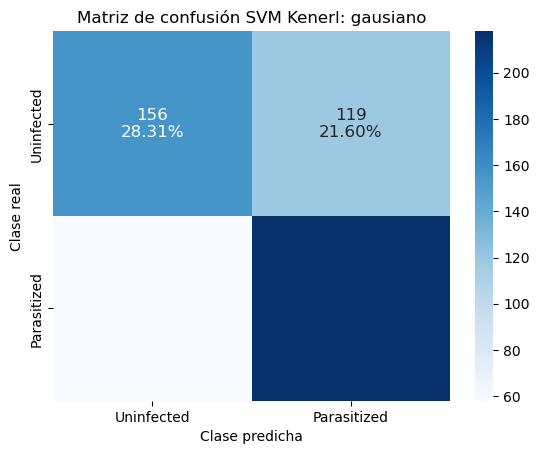

In [88]:
# Crear el DataFrame de la matriz de confusión
cf_matrix3 = confusion_matrix(y_test,y_pred_rbf)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix3.shape[0], cf_matrix3.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix3, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: gausiano')
plt.show()

In [89]:
cf_matrix3

array([[156, 119],
       [ 58, 218]], dtype=int64)

In [90]:
report = classification_report(y_test, y_pred_rbf, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       275
           1       0.65      0.79      0.71       276

    accuracy                           0.68       551
   macro avg       0.69      0.68      0.67       551
weighted avg       0.69      0.68      0.67       551



In [91]:
# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn3 = cf_matrix3[0, 0]
fp3 = cf_matrix3[0, 1]  # Falsos positivos en la clase 0
specificity = tn3 / (tn3 + fp3)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
   


Especificidad:	0.57


### 5.3.2.- Curva ROC RBF

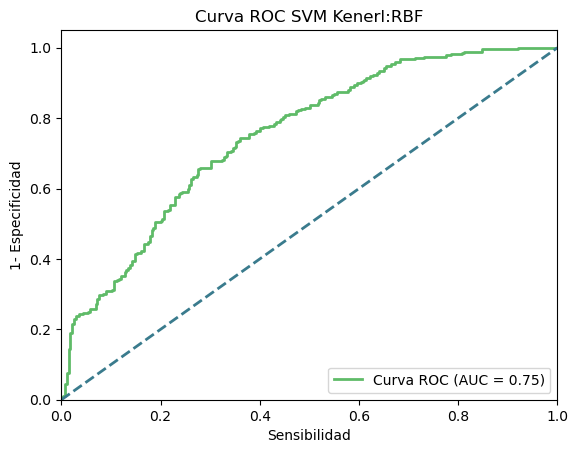

In [92]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores3 = best_model_rbf.decision_function(testX2)


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr3, tpr3, _ = roc_curve(y_test_bin, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr3, tpr3, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensibilidad')
plt.ylabel('1- Especificidad')
plt.title('Curva ROC SVM Kenerl:RBF')
plt.legend(loc="lower right")
plt.savefig('curva_roc5.png')
plt.show()

# 6.- Conclusiones

## 6.1.- Conclusión SVM no lineal

Resultados datos de entrenamiento

In [93]:
# Crear un catálogo para almacenar los mejores puntajes y parámetros de cada modelo
best_results = {
    "Modelo Lineal": {
        "best_score": best_score_linear,
        "best_params": best_params_linear
    },
    "Modelo Polinomial": {
        "best_score": best_score_poly,
        "best_params": best_params_poly
    },
    "Modelo RBF": {
        "best_score": best_score_rbf,
        "best_params": best_params_rbf
    }
}

# Imprimir el catálogo de mejores resultados para cada modelo
for modelo, resultados in best_results.items():
    print(f"Modelo: {modelo}")
    print(f"Mejor Puntaje: {resultados['best_score']:.3f}")
    print(f"Mejores Parámetros: {resultados['best_params']}")
    print()


Modelo: Modelo Lineal
Mejor Puntaje: 0.639
Mejores Parámetros: {'C': 0.01, 'kernel': 'linear'}

Modelo: Modelo Polinomial
Mejor Puntaje: 0.659
Mejores Parámetros: {'C': 1, 'coef0': 0.8888888888888888, 'degree': 2, 'kernel': 'poly'}

Modelo: Modelo RBF
Mejor Puntaje: 0.704
Mejores Parámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}



Resultados datos de test

In [94]:
print('F1 en el conjunto de prueba linear:', round(f1_score(y_test, y_pred_linear), 4))
print('F1 en el conjunto de prueba poly:', round(f1_score(y_test, y_pred_poly), 4))
print('F1 en el conjunto de prueba rbf:', round(f1_score(y_test, y_pred_rbf), 4))

F1 en el conjunto de prueba linear: 0.6316
F1 en el conjunto de prueba poly: 0.6906
F1 en el conjunto de prueba rbf: 0.7113


In [95]:
# Imprimir el AUC para cada modelo
print("AUC para el modelo lineal:", round(roc_auc1, 4))
print("AUC para el modelo polinomial:", round(roc_auc2, 4))
print("AUC para el modelo RBF:", round(roc_auc3, 4))

AUC para el modelo lineal: 0.7268
AUC para el modelo polinomial: 0.7553
AUC para el modelo RBF: 0.7514


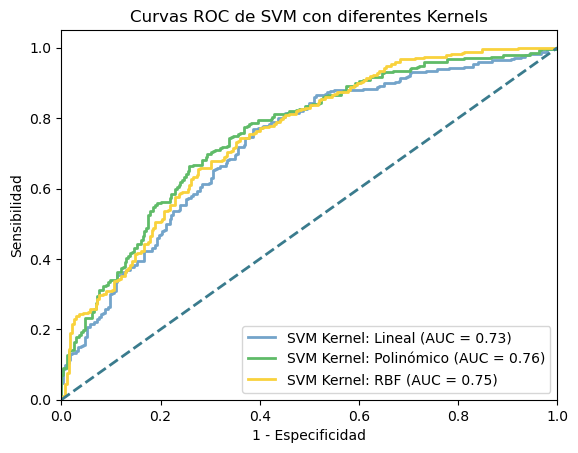

In [106]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar la primera curva ROC
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)

# Trazar la segunda curva ROC
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)

# Trazar la tercera curva ROC
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM con diferentes Kernels')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()


## 6.2.- Comparar SVM lineal vs SVM no lineal kernel lineal

Resultados datos de entrenamiento

In [96]:
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", grid_search.best_score_)

Mejores Parámetros: {'C': 0.001}
Mejor Score F1: 0.6322636798755434


Resultados datos de test

In [97]:
print('Precisión en el conjunto de prueba SVM lineal:', round(f1_score(y_test, y_pred),4))

Precisión en el conjunto de prueba SVM lineal: 0.6348


In [98]:
print("AUC para el modelo SVM lineal:", round(roc_auc, 4))

AUC para el modelo SVM lineal: 0.7226
